## Import libraries

In [1]:
import pandas as pd
import numpy as np

# Encoder
from sklearn.preprocessing import LabelEncoder
# Scaler
from sklearn.preprocessing import StandardScaler

# Split dataset
from sklearn.model_selection import train_test_split

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machines
from sklearn.svm import SVC

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#  Tune hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# pickle module
import pickle
from joblib import dump, load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data_for_change

/content/drive/MyDrive/Data_for_change


## Import the dataset

In [4]:
worldbank_data = pd.read_csv('worldbank_data.csv')
worldbank_data

,reside,district,region,food_consumption_annual,Health_drugs_consumption_annual,Tobacco_consumption_annual,Health_annual_consumption,Total_annual_consumption_per_household,poor_hh_below_poverty_line,received_SSN,...,Vegetables,Meat_Fish,Fruits,Milk_Products,Fats_Oil,Sugar_Product,Illness,latitude,longitude,TARGET
0,2,101,1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,...,7,1,3,0,5,3,1,-9.700570,33.239170,1
1,2,101,1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,...,7,1,3,0,5,3,33,-9.700570,33.239170,0
2,2,101,1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,...,7,1,3,0,5,3,1,-9.700570,33.239170,1
3,2,101,1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,...,7,1,3,0,5,3,33,-9.700570,33.239170,0
4,2,101,1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,...,7,1,3,0,5,3,1,-9.700570,33.239170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479934,2,307,3,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,...,7,3,2,0,7,0,33,-16.377001,35.264339,0
479935,2,307,3,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,...,7,3,2,0,7,0,33,-16.377001,35.264339,0
479936,2,307,3,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,...,7,3,2,0,7,0,33,-16.377001,35.264339,0
479937,2,307,3,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,...,7,3,2,0,7,0,33,-16.377001,35.264339,0


In [7]:
df_wb.columns

Index(['reside', 'district', 'region', 'food_consumption_annual',
       'Health_drugs_consumption_annual', 'Tobacco_consumption_annual',
       'Health_annual_consumption', 'Total_annual_consumption_per_household',
       'poor_hh_below_poverty_line', 'received_SSN', 'Cereals_Grains',
       'Roots_Tubers', 'Nuts_Pulses', 'Vegetables', 'Meat_Fish', 'Fruits',
       'Milk_Products', 'Fats_Oil', 'Sugar_Product', 'Illness', 'latitude',
       'longitude', 'TARGET'],
      dtype='object')

## Drop unwanted columns

In [8]:
df_wb.drop(columns=['latitude', 'longitude', 'reside', 'district', 'region'], inplace=True)
df_wb

<ipython-input-8-85e205836a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wb.drop(columns=['latitude', 'longitude', 'reside', 'district', 'region'], inplace=True)


,food_consumption_annual,Health_drugs_consumption_annual,Tobacco_consumption_annual,Health_annual_consumption,Total_annual_consumption_per_household,poor_hh_below_poverty_line,received_SSN,Cereals_Grains,Roots_Tubers,Nuts_Pulses,Vegetables,Meat_Fish,Fruits,Milk_Products,Fats_Oil,Sugar_Product,Illness,TARGET
0,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,7,2.0,0,7,1,3,0,5,3,1,1
1,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,7,2.0,0,7,1,3,0,5,3,33,0
2,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,7,2.0,0,7,1,3,0,5,3,1,1
3,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,7,2.0,0,7,1,3,0,5,3,33,0
4,200781.5938,1272.77063,0.0,1272.77063,399673.4688,1,0,7,2.0,0,7,1,3,0,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479934,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,7,4.0,0,7,3,2,0,7,0,33,0
479935,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,7,4.0,0,7,3,2,0,7,0,33,0
479936,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,7,4.0,0,7,3,2,0,7,0,33,0
479937,436995.0625,0.00000,0.0,0.00000,711575.5000,1,0,7,4.0,0,7,3,2,0,7,0,33,0


### Split the dataset into target and predictor variables

In [11]:
# Split the dataset into target and predictor variables
X = df_wb.drop('TARGET', axis=1)
y = df_wb['TARGET']

In [12]:
X.shape, y.shape

((479510, 17), (479510,))

In [13]:
# Convert the NumPy array to a Pandas DataFrame
y_df = pd.DataFrame(y)

# Add column names (optional)
y_df.columns = ['Vitamins_Diff']

y_df

,Vitamins_Diff
0,1
1,0
2,1
3,0
4,1
...,...
479934,0
479935,0
479936,0
479937,0


## Data cleaning: Handle missing and duplicate values

In [46]:
# Drop rows with missing data
df_wb = X.dropna()

#### Missing Data for X



In [47]:
missing_data = df_wb.isnull()

# Check if any missing data exists in the DataFrame
if missing_data.any().any():
    print("There is missing data in the DataFrame.")
else:
    print("There is no missing data in the DataFrame.")

There is no missing data in the DataFrame.


In [48]:
columns_with_missing_data = df_wb.isnull().any().sum()
print(f"Number of columns with missing data: {columns_with_missing_data}")

Number of columns with missing data: 0


#### Missing Data for Y

In [49]:
# Check for missing data
missing_datay = y_df.isnull()

# Sum the missing values in each column
missing_county = missing_datay.sum()
missing_county

Vitamins_Diff    0
dtype: int64

In [50]:
# Check if there are any missing values in the DataFrame
if missing_county.any():
    print("\nThere are missing values in the DataFrame.")
else:
    print("\nNo missing values in the DataFrame.")


No missing values in the DataFrame.


## Explore the data

#### Summary statistics

In [51]:
# numerical summary stats
df_wb.describe()

,food_consumption_annual,Health_drugs_consumption_annual,Tobacco_consumption_annual,Health_annual_consumption,Total_annual_consumption_per_household,poor_hh_below_poverty_line,received_SSN,Cereals_Grains,Roots_Tubers,Nuts_Pulses,Vegetables,Meat_Fish,Fruits,Milk_Products,Fats_Oil,Sugar_Product,Illness
count,4.795100e+05,479510.000000,479510.000000,479510.000000,4.795100e+05,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000,479510.000000
mean,5.974167e+05,6225.494513,622.689292,17494.379320,1.116542e+06,0.468647,0.038418,6.628002,2.329349,2.422202,6.103779,2.749240,2.153726,0.891437,4.306115,3.309812,27.421345
std,3.759518e+05,12376.993478,4686.776215,37532.254783,9.141334e+05,0.499017,0.192204,1.249675,2.247391,1.879154,1.568402,1.986842,2.456465,1.994709,2.739417,3.011424,11.129091
min,2.316306e+04,0.000000,0.000000,0.000000,1.315699e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.276335e+05,0.000000,0.000000,0.000000,5.821849e+05,0.000000,0.000000,7.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000,31.000000
50%,5.076532e+05,899.698731,0.000000,3136.488281,8.800458e+05,0.000000,0.000000,7.000000,2.000000,2.000000,7.000000,2.000000,1.000000,0.000000,5.000000,3.000000,33.000000
75%,7.636787e+05,6747.740234,0.000000,17389.791020,1.343789e+06,1.000000,0.000000,7.000000,4.000000,3.000000,7.000000,4.000000,3.000000,0.000000,7.000000,7.000000,33.000000
max,3.948635e+06,166374.812500,77757.929690,523792.562500,1.856058e+07,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,33.000000


In [52]:
y_df.describe()

,Vitamins_Diff
count,479510.000000
mean,1.228473
std,2.288768
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,15.000000


#### Correlations

In [53]:
# correlation matrix
df_wb.corr()

,food_consumption_annual,Health_drugs_consumption_annual,Tobacco_consumption_annual,Health_annual_consumption,Total_annual_consumption_per_household,poor_hh_below_poverty_line,received_SSN,Cereals_Grains,Roots_Tubers,Nuts_Pulses,Vegetables,Meat_Fish,Fruits,Milk_Products,Fats_Oil,Sugar_Product,Illness
food_consumption_annual,1.000000,0.166849,0.033411,0.184632,0.833709,-0.494481,-0.000965,0.044210,0.362642,0.247366,0.172131,0.485675,0.236260,0.550313,0.480414,0.531487,0.057826
Health_drugs_consumption_annual,0.166849,1.000000,0.027920,0.537393,0.190029,-0.092637,0.007734,-0.015972,0.105242,0.067037,0.010300,0.067867,0.037187,0.062847,0.043427,0.054104,-0.143154
Tobacco_consumption_annual,0.033411,0.027920,1.000000,0.028799,0.041046,-0.048474,0.003886,0.000743,0.004893,-0.007505,-0.014450,0.028538,0.026379,0.023436,0.013586,0.011335,-0.009499
Health_annual_consumption,0.184632,0.537393,0.028799,1.000000,0.243385,-0.119583,0.006961,-0.007136,0.094207,0.048561,-0.001574,0.066595,0.024172,0.091294,0.037858,0.074473,-0.132393
Total_annual_consumption_per_household,0.833709,0.190029,0.041046,0.243385,1.000000,-0.457580,-0.010326,0.046984,0.281189,0.180057,0.151900,0.425719,0.215390,0.568108,0.429035,0.493714,0.053498
poor_hh_below_poverty_line,-0.494481,-0.092637,-0.048474,-0.119583,-0.457580,1.000000,0.018560,-0.047020,-0.272808,-0.208510,-0.112535,-0.386628,-0.181972,-0.354500,-0.461166,-0.511957,-0.003498
received_SSN,-0.000965,0.007734,0.003886,0.006961,-0.010326,0.018560,1.000000,0.004011,0.001993,0.020066,0.000845,-0.011668,0.002571,-0.027758,-0.007439,-0.017281,-0.002888
Cereals_Grains,0.044210,-0.015972,0.000743,-0.007136,0.046984,-0.047020,0.004011,1.000000,-0.174316,0.110397,0.208709,0.019809,0.032217,0.031211,0.150228,0.102967,0.001516
Roots_Tubers,0.362642,0.105242,0.004893,0.094207,0.281189,-0.272808,0.001993,-0.174316,1.000000,0.229393,0.067819,0.289728,0.074257,0.178616,0.267152,0.286377,0.023630
Nuts_Pulses,0.247366,0.067037,-0.007505,0.048561,0.180057,-0.208510,0.020066,0.110397,0.229393,1.000000,0.083684,0.165260,0.126745,0.116437,0.238003,0.180276,0.011206


<Axes: >

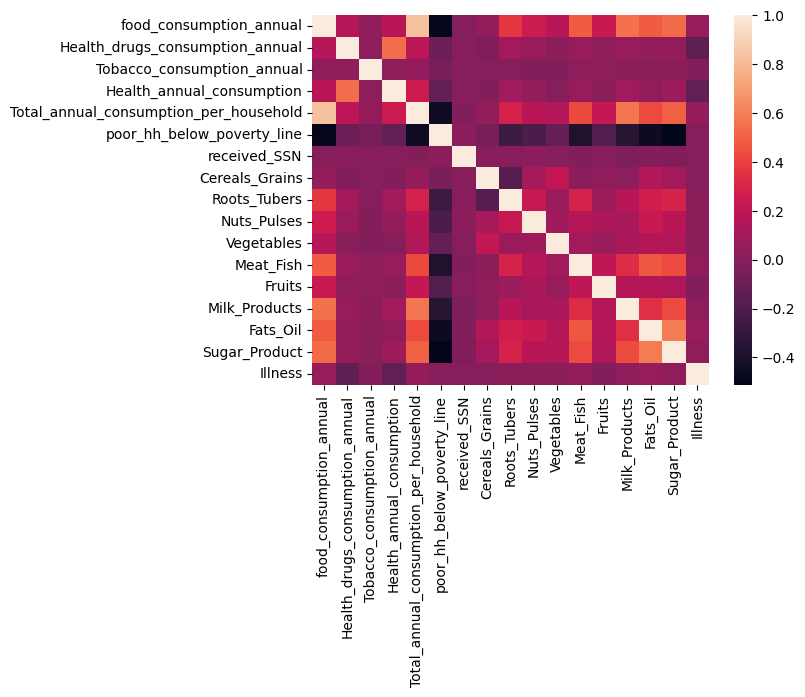

In [54]:
# heatmap of correlations
sns.heatmap(df_wb.corr())

#### Boxplots

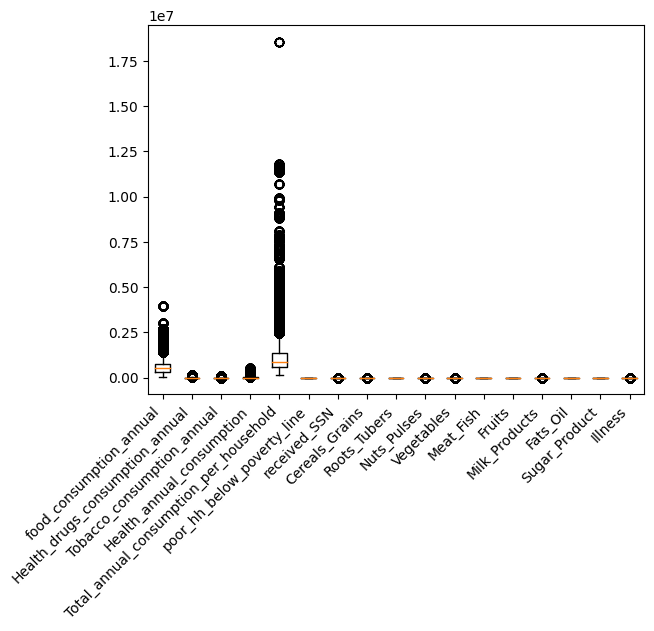

In [55]:
# Create a boxplot
fig, ax = plt.subplots()
ax.boxplot(df_wb.values, widths=0.5)

# Set the x-axis labels
ax.set_xticklabels(df_wb.columns)

# Set the x-axis labels
ax.set_xticklabels(df_wb.columns, rotation=45, ha='right')


# Show the plot
plt.show()

## Feature scaling

In [56]:
# Scale numerical columns
scaler = StandardScaler()
num_cols = ['food_consumption_annual', 'Health_drugs_consumption_annual', 'Tobacco_consumption_annual', 'Health_annual_consumption', \
            'Total_annual_consumption_per_household']
df_wb[num_cols] = scaler.fit_transform(df_wb[num_cols])

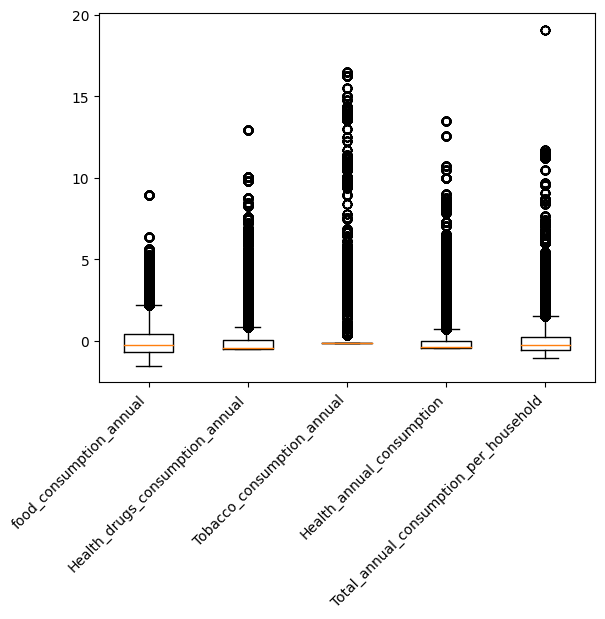

In [58]:
# Create a boxplot
fig, ax = plt.subplots()
ax.boxplot(df_wb[num_cols].values, widths=0.5)

# Set the x-axis labels
ax.set_xticklabels(df_wb[num_cols].columns)

# Set the x-axis labels
ax.set_xticklabels(df_wb[num_cols].columns, rotation=45, ha='right')


# Show the plot
plt.show()

## Encode any categorical variables

In [59]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_wb['poor_hh_below_poverty_line'] = label_encoder.fit_transform(df_wb['poor_hh_below_poverty_line'])
df_wb['received_SSN'] = label_encoder.fit_transform(df_wb['received_SSN'])
df_wb['Cereals_Grains'] = label_encoder.fit_transform(df_wb['Cereals_Grains'])
df_wb['Roots_Tubers'] = label_encoder.fit_transform(df_wb['Roots_Tubers'])
df_wb['Nuts_Pulses'] = label_encoder.fit_transform(df_wb['Nuts_Pulses'])
df_wb['Vegetables'] = label_encoder.fit_transform(df_wb['Vegetables'])
df_wb['Meat_Fish'] = label_encoder.fit_transform(df_wb['Meat_Fish'])
df_wb['Fruits'] = label_encoder.fit_transform(df_wb['Fruits'])
df_wb['Milk_Products'] = label_encoder.fit_transform(df_wb['Milk_Products'])
df_wb['Fats_Oil'] = label_encoder.fit_transform(df_wb['Fats_Oil'])
df_wb['Sugar_Product'] = label_encoder.fit_transform(df_wb['Sugar_Product'])
df_wb['Illness'] = label_encoder.fit_transform(df_wb['Illness'])
y = label_encoder.fit_transform(y_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
df_wb

,food_consumption_annual,Health_drugs_consumption_annual,Tobacco_consumption_annual,Health_annual_consumption,Total_annual_consumption_per_household,poor_hh_below_poverty_line,received_SSN,Cereals_Grains,Roots_Tubers,Nuts_Pulses,Vegetables,Meat_Fish,Fruits,Milk_Products,Fats_Oil,Sugar_Product,Illness
0,-1.055017,-0.400156,-0.132861,-0.432205,-0.784207,1,0,7,2,0,7,1,3,0,5,3,0
1,-1.055017,-0.400156,-0.132861,-0.432205,-0.784207,1,0,7,2,0,7,1,3,0,5,3,31
2,-1.055017,-0.400156,-0.132861,-0.432205,-0.784207,1,0,7,2,0,7,1,3,0,5,3,0
3,-1.055017,-0.400156,-0.132861,-0.432205,-0.784207,1,0,7,2,0,7,1,3,0,5,3,31
4,-1.055017,-0.400156,-0.132861,-0.432205,-0.784207,1,0,7,2,0,7,1,3,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479934,-0.426708,-0.502990,-0.132861,-0.466116,-0.443007,1,0,7,4,0,7,3,2,0,7,0,31
479935,-0.426708,-0.502990,-0.132861,-0.466116,-0.443007,1,0,7,4,0,7,3,2,0,7,0,31
479936,-0.426708,-0.502990,-0.132861,-0.466116,-0.443007,1,0,7,4,0,7,3,2,0,7,0,31
479937,-0.426708,-0.502990,-0.132861,-0.466116,-0.443007,1,0,7,4,0,7,3,2,0,7,0,31


In [61]:
y

array([1, 0, 1, ..., 0, 0, 0])

## Split the dataset

In [62]:
# Calculate the index for splitting the data
split_index = int(0.8 * len(df_wb))
split_index

383608

In [63]:
df_y = pd.DataFrame(y)

In [64]:
# Split the data into training and testing sets
X_train = df_wb.iloc[:split_index]
y_train = df_y.iloc[:split_index]

X_test = df_wb.iloc[split_index:]
y_test = df_y.iloc[split_index:]

In [65]:
X_train.shape, y_train.shape

((383608, 17), (383608, 1))

In [66]:
X_test.shape, y_test.shape

((95902, 17), (95902, 1))

## ML Methods
### Random Forest

In [67]:
# Define the model
rf = RandomForestClassifier()

#### Train the Model

In [68]:
rf.fit(X_train, y_train)

<ipython-input-68-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

#### Make predictions

In [69]:
# Predict on test set
y_pred = rf.predict(X_test)

#### Evaluate the accuracy  of the model

In [70]:
# Train and predict on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.9069779566640946
Precision:  0.9615242074424836
Recall:  0.9069779566640946
F1-score:  0.9263455787956206


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71922
           1       0.00      0.00      0.00         0
           2       0.09      0.24      0.13       715
           3       1.00      0.08      0.15       156
           4       0.98      0.66      0.79     14942
           5       0.74      0.76      0.75      6554
           6       0.00      0.00      0.00       143
           7       0.01      0.50      0.01        52
           8       0.67      0.07      0.12       755
           9       0.22      0.05      0.08       533
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00       104
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00        26

    accuracy                           0.91     95902
   macro avg       0.31      0.22      0.20     95902
weighted avg       0.96   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#### Hyperparameters

In [ ]:
# Define hyperparameter grid
params = {'n_estimators': [100, 200, 500],
          'max_features': [5, 10, 15],
          'max_depth': [5, 8, 15],
          'criterion': ['gini', 'entropy'],
          'min_samples_split': [8, 10, 12]}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Evaluate metrics on test set
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ymersha\AppData\Local\anaconda3\envs\comp_env1\lib\site-packages\sklearn\base.py:1151: DataCon

Accuracy: 0.22


In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

#grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
#grid_rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [ ]:
# Feature importance
print(best_rf.feature_importances_)

NameError: ignored

#### Analyze the feature importances

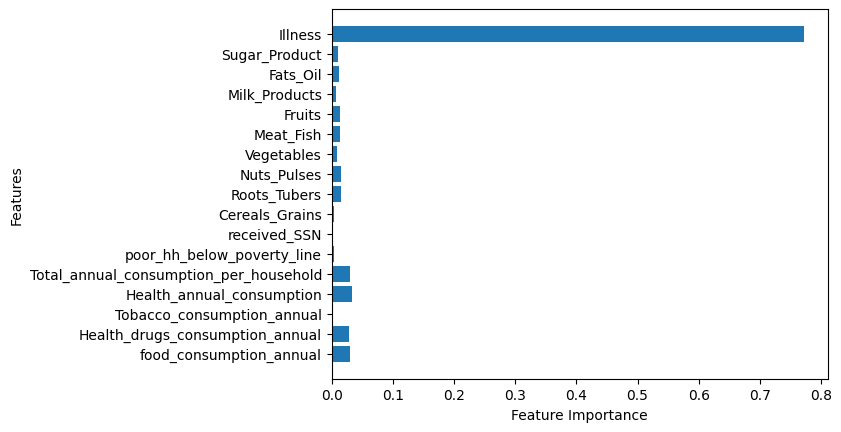

In [73]:
importances = rf.feature_importances_

# Plot importances
plt.barh(X_train.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

#### Save model

In [74]:
# Save the model to a file using Pickle
with open('random_forest_model1.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [75]:
# Save the model using joblib
dump(rf, 'random_forest_model1.joblib')

['random_forest_model1.joblib']

### Decision Trees

In [76]:
# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=8, criterion='entropy' )

#### Train the Model

In [77]:

# Fit the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

#### Make predictions

In [78]:
y_pred = clf.predict(X_test)

#### Evaluate the accuracy  of the model

In [79]:
# Train and predict on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.9047777939980397
Precision:  0.9816500845968242
Recall:  0.9047777939980397
F1-score:  0.9318788404524391


#### Hyperparameters

In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}
Accuracy: 0.215


#### Analyze the feature importances

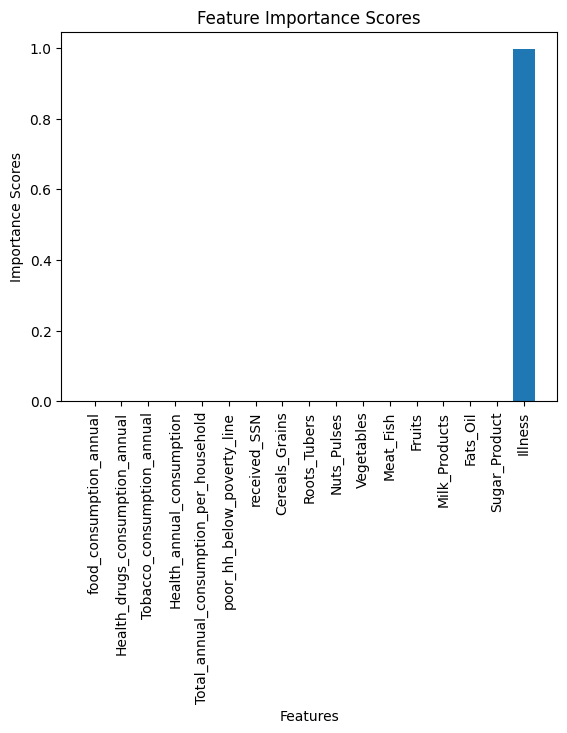

In [81]:
# Extract the feature importance scores
importances = clf.feature_importances_

# Visualize the feature importance scores
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance Scores')
plt.show()

#### Save model

In [83]:
# Save the model to a file using Pickle
with open('DecisionTree1.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [84]:
# Save the model using joblib
dump(clf, 'DecisionTree1.joblib')

['DecisionTree1.joblib']

### Support Vector Machines (SVM)

In [85]:
svm = SVC()

#### Train the Model

In [86]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

#### Make predictions

In [87]:
y_pred = svm.predict(X_test)

#### Evaluate the accuracy  of the model

In [88]:
# Train and predict on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.8919000646493295
Precision:  0.9394158757709833
Recall:  0.8919000646493295
F1-score:  0.9082417150456584


#### Hyperparameters

In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create an SVM classifier
svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the testing set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

#### Analyze the feature importances

In [ ]:
# Calculate the feature importance using permutation importance
result = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=42)
importances = result.importances_mean

# Visualize the feature importance scores
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance Scores')
plt.show()

#### Save model

In [90]:
# Save the model to a file using Pickle
with open('SupportVectorMachines1.pkl', 'wb') as f:
    pickle.dump(svm, f)

In [91]:
# Save the model using joblib
dump(svm, 'SupportVectorMachines1.joblib')

['SupportVectorMachines1.joblib']